# Explore

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data separation/transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# system manipulation
import itertools
import os
import sys
sys.path.append("./util_")
import prepare_
# import explore_

# other
import env
import warnings
warnings.filterwarnings("ignore")

# set the random seed
np.random.seed(95)


# set a default them for all my visuals
sns.set_theme(style="whitegrid")

**Get training data**

In [2]:
train = pd.read_csv("./00_project_data/1-1_training_data.csv", index_col=0)
train.head()

,bank_name,city,state,acquiring_institution,fund,days_diff,year,month,day,month_number,weekday_number
closing_date,,,,,,,,,,,
2000-10-13,Bank of Honolulu,Honolulu,HI,Bank of the Orient,4645,62,2000,October,Friday,10,4
2000-12-14,National State Bank of Metropolis,Metropolis,IL,Banterra Bank of Marion,4646,50,2000,December,Thursday,12,3
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,Southern New Hampshire Bank & Trust,4647,90,2001,February,Friday,2,4
2001-05-03,Malta National Bank,Malta,OH,North Valley Bank,4648,85,2001,May,Thursday,5,3
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,"Superior Federal, FSB",6004,42,2001,July,Friday,7,4


**target distribution**

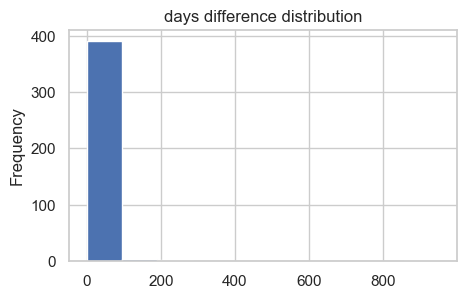

In [3]:
# how is the data distributed
plt.figure(figsize=(5,3))
train.days_diff.plot(kind="hist")
plt.title("days difference distribution")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "distribution in days difference",
              folder_name= 2)
plt.show()

In [4]:
# resample the data by year, month and day
sample_by_year = train.groupby("year")
sample_by_month = train.sort_values("month_number").groupby("month_number")
sample_by_day = train.sort_values("weekday_number").groupby("weekday_number")

sample_by_year

**Are there any seasonal patterns in bank failures, i.e., do failures tend to occur more frequently during specific times of the year?**

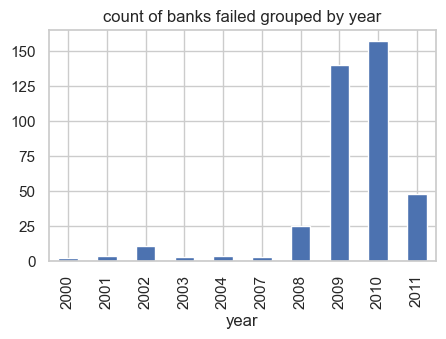

In [5]:
# Plot the count of all failed banks per year
plt.figure(figsize=(5,3))
sample_by_year.count().bank_name.plot(kind="bar")
plt.title("count of banks failed grouped by year")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "2_Total_days_difference_grouped_by_year",
              folder_name= 2)
plt.show()

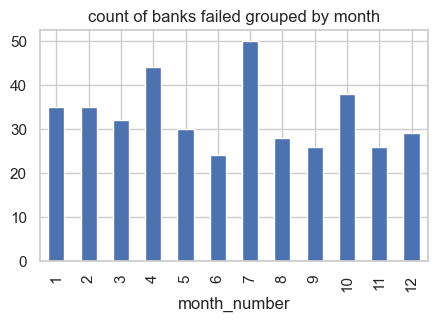

In [6]:
# Plot the count of all failed banks per month
plt.figure(figsize=(5,3))
sample_by_month.days_diff.count().plot(kind="bar")
plt.title("count of banks failed grouped by month")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "2_Total_days_difference_grouped_by_month",
              folder_name= 2)
plt.show()

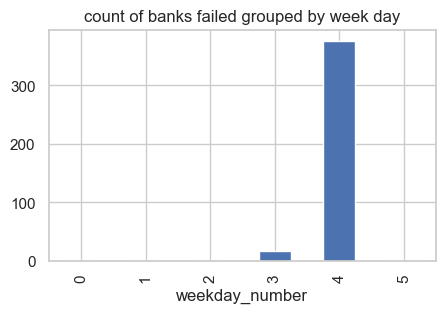

In [7]:
# Plot the count of all failed banks per week
plt.figure(figsize=(5,3))
sample_by_day.days_diff.count().plot(kind="bar")
plt.title("count of banks failed grouped by week day")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "2_Total_days_difference_grouped_by_weekday",
              folder_name= 2)
plt.show()

**Identify any long-term cycles or periodicities in the data that might be related to economic cycles or regulatory changes?**

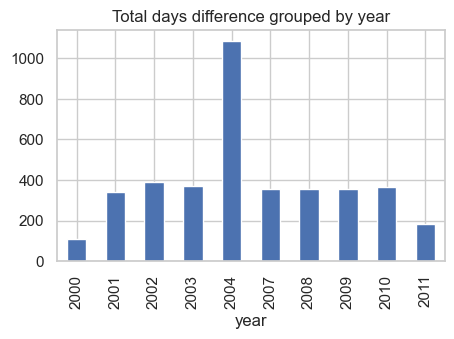

In [8]:
# Plot the sum of days differences per year
plt.figure(figsize=(5,3))
sample_by_year.sum().days_diff.plot(kind="bar")
plt.title("Total days difference grouped by year")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "1_Total_days_difference_grouped_by_year",
              folder_name= 2)
plt.show()

- 2004 have highest time between bank failers.
    - More banks fail over time and the time differences sum up about the dame.

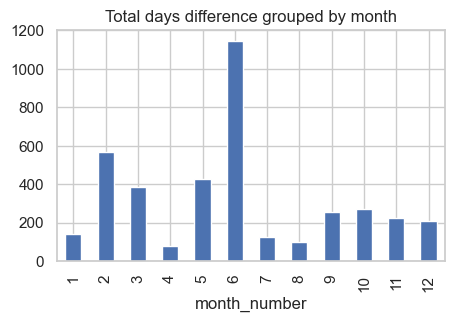

In [9]:
# Plot the sum of days differences per month
plt.figure(figsize=(5,3))
sample_by_month.days_diff.sum().plot(kind="bar")
plt.title("Total days difference grouped by month")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "1_Total_days_difference_grouped_by_month",
              folder_name= 2)
plt.show()

- The month of June have the highest time between bank failers.

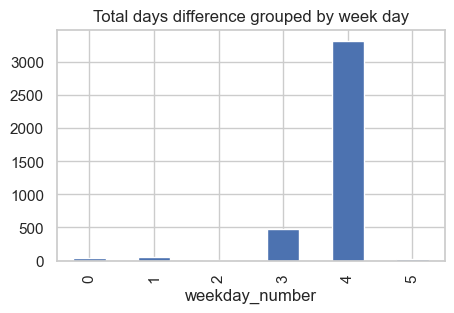

In [10]:
# Plot the sum of days differences per week
plt.figure(figsize=(5,3))
sample_by_day.days_diff.sum().plot(kind="bar")
plt.title("Total days difference grouped by week day")

# save visual
prepare_.save_visuals_(plt.gcf(), viz_name= "1_Total_days_difference_grouped_by_weekday",
              folder_name= 2)
plt.show()

- About all baks fail on Fridays


Q: Is there a higher likly hood for of banks to fail in June and on a tuesday?

**What is the overall trend in the number of bank failures over time? Is there an increasing or decreasing pattern?**

<Axes: title={'center': 'Seasonal Plot'}, xlabel='month'>

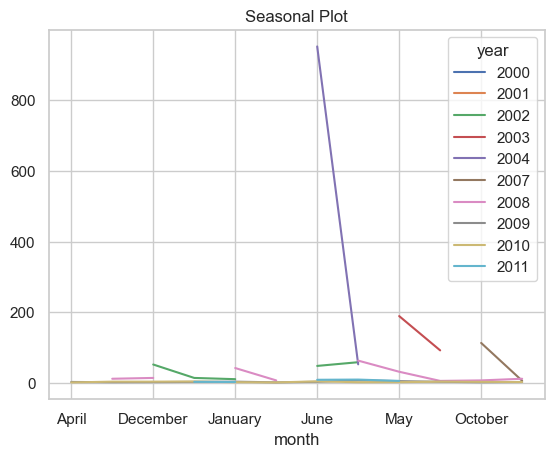

In [11]:
# .unstack turns an index level into columns
train.groupby(["year", "month"]).days_diff.mean().unstack(0).plot(title='Seasonal Plot')


I see no seasonality in this data.

**Is there a linear relationship between days difference and lag days**

Text(0.5, 1.0, 'Lag plot with lag=1')

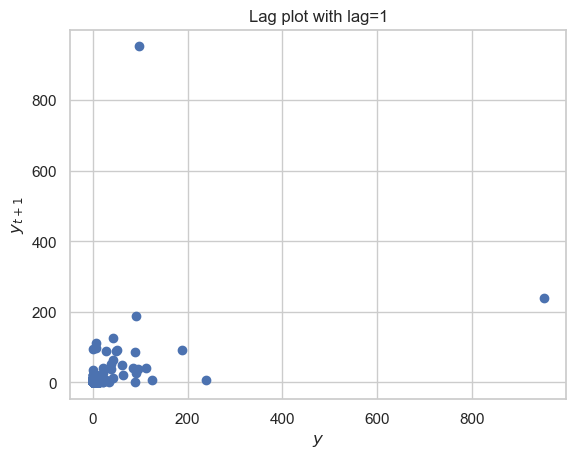

In [12]:
plt.scatter(train.days_diff, train.days_diff.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

The visual shows no relationship between the original datetime from the loged dates. (Failed banks look to be independent from each other.)

Q: Is there a relationship between failed banks and the acquiring institution?

**How do different types of banks (e.g., commercial banks, savings banks, credit unions) compare in terms of failure rates? Are there any notable differences?**

**Identify any anomalies or outliers in the data that might require further investigation?**

**How do regional or geographical factors influence bank failures? Are there specific areas with higher failure rates?**

**Take aways**

- 2004 have highest time between bank failers.
    - More banks fail over time and the time differences sum up about the dame.
- The month of June have the highest time between bank failers.
- About all baks fail on Fridays

Q: Is there a higher likly hood for of banks to fail in June and on a tuesday?